# TP2 : Nettoyage des données

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [171]:
# load data
data = pd.read_csv("security_attack_dataset .csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
data.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,NaN,164.147.161.113,2.0
5,1/3/2023 1:00,11.91.126.70,Brute Force,209.215.241.17,15.0
6,1/1/2023 16:00,234.1.157.231,DDoS,197.122.130.239,NaN
7,1/4/2023 21:00,25.209.29.122,Brute Force,201.194.251.6,2.0
8,1/1/2023 0:00,64.48.200.180,SQL Injection,196.64.247.4,2.0
9,1/1/2023 7:00,125.96.188.100,SQL Injection,200.236.45.192,15.0


In [173]:
# data decribe
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AttackDurationHours
count,355.000000
mean,7.735211
std,5.689993
min,2.000000
25%,2.000000
50%,5.000000
75%,15.000000
max,15.000000


In [174]:
def count_col(data, col):
    return data.count().loc[col]

def miss_count(data, col):
    return data.shape[0] - count_col(data, col)

def miss_frq(data, col):
    return miss_count(data, col) / data.shape[0]

def dtype_col(data, col):
    return dict(data.dtypes)[col]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
# description data :
def desc_data(data):
    idx =  ["count", "missCount", "missFreq", "type"]
    # get columns :
    cols = list(data.columns)

    desc_dict = {
        col : [count_col(data, col), miss_count(data, col) , miss_frq(data, col), dtype_col(data, col)] for col in cols
    }

    return pd.DataFrame(data=desc_dict, index=idx)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
desc = desc_data(data)
desc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,355
missCount,0,0,118,0,145
missFreq,0.0,0.0,0.236,0.0,0.29
type,object,object,object,object,float64


### Note :
As we see that this is only two columns, which have missing values `AttackType`, `AttackDurationHours` The fisrt one is categorical type, and last one is Numerical type.

In [177]:
num_miss = desc.loc["missCount"].values
num_miss

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 118, 0, 145], dtype=object)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<BarContainer object of 5 artists>

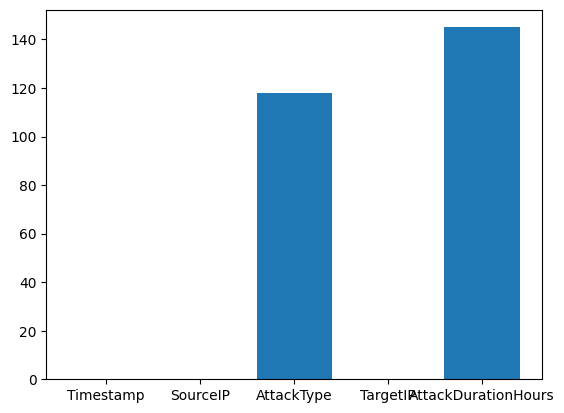

In [178]:
plt.bar(desc.columns, num_miss)

# 7. Les caractéristiques numériques :

In [179]:
Attck_col = "AttackDurationHours"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### a. Remplacez les caractéristiques numériques manquantes par la moyenne.

In [180]:
data7a = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
mean = data7a[Attck_col].mean()
data7a[Attck_col].fillna(mean, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [182]:
print("Mean : ", mean)
desc_data(data7a)

Mean :  7.735211267605634


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,500
missCount,0,0,118,0,0
missFreq,0.0,0.0,0.236,0.0,0.0
type,object,object,object,object,float64


### b. Remplacez les caractéristiques numériques manquantes par la médiane.

In [183]:
data7b = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
median = data7b[Attck_col].median()
data7b[Attck_col].fillna(median, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
print("Median : ", median)
desc_data(data7b)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Median :  5.0


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,500
missCount,0,0,118,0,0
missFreq,0.0,0.0,0.236,0.0,0.0
type,object,object,object,object,float64


### c. Supprimez les caractéristiques numériques manquantes

In [186]:
data7c = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
data7c.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [188]:
desc_data(data7c)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,273,273,273,273,273
missCount,0,0,0,0,0
missFreq,0.0,0.0,0.0,0.0,0.0
type,object,object,object,object,float64


### d. Remplacez les caractéristiques numériques manquantes par une valeur constante de votre choix

In [189]:
data7d = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
cste = 4.5
data7d[Attck_col].fillna(cste, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
desc_data(data7d)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,500
missCount,0,0,118,0,0
missFreq,0.0,0.0,0.236,0.0,0.0
type,object,object,object,object,float64


### e. En utilisant la méthode de remplissage en avant (Forward Fill) et la méthode de remplissage en arrière (Backward Fill), remplissez les valeurs manquantes

### Forward :

In [192]:
data7ef = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [193]:
data7ef[Attck_col].ffill(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [194]:
desc_data(data7ef)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,500
missCount,0,0,118,0,0
missFreq,0.0,0.0,0.236,0.0,0.0
type,object,object,object,object,float64


### Backward :

In [195]:
data7eb = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
data7eb[Attck_col].bfill(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [197]:
desc_data(data7eb)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,500
missCount,0,0,118,0,0
missFreq,0.0,0.0,0.236,0.0,0.0
type,object,object,object,object,float64


### f. Remplacez les caractéristiques numériques manquantes en utilisant l'interpolation.

In [198]:
data7f = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
data7f[Attck_col].interpolate(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
desc_data(data7f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
count,500,500,382,500,500
missCount,0,0,118,0,0
missFreq,0.0,0.0,0.236,0.0,0.0
type,object,object,object,object,float64


### g. Remplacez les caractéristiques numériques manquantes en utilisant un modèle de régression de votre choix.

In [201]:
data7g = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


###traitements suivants pour les caractéristiques catégorielles:

---



####a.	Remplacez les caractéristiques catégorielles manquantes par une valeur constante de votre choix

In [202]:
categorical_column =data.select_dtypes(include=['object'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
data_constant=data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
valeur_constante ='Phishing'  # Remplacez par la valeur de votre choix

data_constant['AttackType'].fillna(valeur_constante, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


####b.Forward Fill and backward fill

In [205]:
data_ffill=data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
data_ffill['AttackType'].fillna(method='ffill', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
data_bfill=data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [208]:
data_ffill['AttackType'].fillna(method='bfill', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### c.le mode

In [209]:
data_mode=data.copy()
data_mode

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,NaN,164.147.161.113,2.0
...,...,...,...,...,...
495,1/4/2023 4:00,252.211.35.134,NaN,190.10.13.143,2.0
496,1/2/2023 15:00,238.60.251.52,Phishing,180.140.142.93,5.0
497,1/4/2023 5:00,135.216.199.93,SQL Injection,175.126.231.76,15.0
498,1/2/2023 0:00,29.134.244.83,DDoS,169.192.143.229,NaN


In [210]:
data_mode['AttackType'].fillna(data_mode['AttackType'].mode()[0], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
data_mode

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,Brute Force,164.147.161.113,2.0
...,...,...,...,...,...
495,1/4/2023 4:00,252.211.35.134,Brute Force,190.10.13.143,2.0
496,1/2/2023 15:00,238.60.251.52,Phishing,180.140.142.93,5.0
497,1/4/2023 5:00,135.216.199.93,SQL Injection,175.126.231.76,15.0
498,1/2/2023 0:00,29.134.244.83,DDoS,169.192.143.229,NaN


#### Random sampling

In [212]:
import random

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [213]:
def remplacer_par_aleatoire(colonne):
    non_manquantes = colonne.dropna()
    valeur_aleatoire = random.choice(non_manquantes)
    colonne.fillna(valeur_aleatoire, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
data_random=data.copy()
data_random

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,NaN,164.147.161.113,2.0
...,...,...,...,...,...
495,1/4/2023 4:00,252.211.35.134,NaN,190.10.13.143,2.0
496,1/2/2023 15:00,238.60.251.52,Phishing,180.140.142.93,5.0
497,1/4/2023 5:00,135.216.199.93,SQL Injection,175.126.231.76,15.0
498,1/2/2023 0:00,29.134.244.83,DDoS,169.192.143.229,NaN


In [215]:
remplacer_par_aleatoire(data_random['AttackType'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [216]:
data_random

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,Brute Force,164.147.161.113,2.0
...,...,...,...,...,...
495,1/4/2023 4:00,252.211.35.134,Brute Force,190.10.13.143,2.0
496,1/2/2023 15:00,238.60.251.52,Phishing,180.140.142.93,5.0
497,1/4/2023 5:00,135.216.199.93,SQL Injection,175.126.231.76,15.0
498,1/2/2023 0:00,29.134.244.83,DDoS,169.192.143.229,NaN


####K-Nearest Neighbors KNN

In [217]:
from fancyimpute import KNN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [219]:
data_categorielles=data.copy()
data_categorielles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,NaN,164.147.161.113,2.0
...,...,...,...,...,...
495,1/4/2023 4:00,252.211.35.134,NaN,190.10.13.143,2.0
496,1/2/2023 15:00,238.60.251.52,Phishing,180.140.142.93,5.0
497,1/4/2023 5:00,135.216.199.93,SQL Injection,175.126.231.76,15.0
498,1/2/2023 0:00,29.134.244.83,DDoS,169.192.143.229,NaN


In [220]:
!pip install fancyimpute



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [221]:

categorical_columns = ['AttackType']

# Select the categorical columns
data_categorical = data_categorielles[categorical_columns]

# Perform one-hot encoding to convert categorical data to binary
encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data_categorical)

# Perform KNN imputation on the one-hot encoded data
imputer = KNN(k=5)  # Adjust k (number of neighbors) as needed
data_imputed_encoded = imputer.fit_transform(data_encoded)

# Replace the imputed categorical columns in the original DataFrame
data_categorielles[categorical_columns] = encoder.inverse_transform(data_imputed_encoded)



Imputing row 1/500 with 0 missing, elapsed time: 0.028
Imputing row 101/500 with 0 missing, elapsed time: 0.029
Imputing row 201/500 with 0 missing, elapsed time: 0.031
Imputing row 301/500 with 0 missing, elapsed time: 0.033
Imputing row 401/500 with 0 missing, elapsed time: 0.034


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")


In [222]:
data_categorielles

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Timestamp,SourceIP,AttackType,TargetIP,AttackDurationHours
0,1/4/2023 22:00,235.86.247.11,DDoS,196.107.124.176,5.0
1,1/3/2023 23:00,77.136.188.217,DDoS,139.107.85.198,5.0
2,1/5/2023 1:00,89.193.77.109,Phishing,57.104.181.159,2.0
3,1/1/2023 11:00,4.252.82.108,Phishing,32.5.147.45,2.0
4,1/3/2023 9:00,205.3.29.75,NaN,164.147.161.113,2.0
...,...,...,...,...,...
495,1/4/2023 4:00,252.211.35.134,NaN,190.10.13.143,2.0
496,1/2/2023 15:00,238.60.251.52,Phishing,180.140.142.93,5.0
497,1/4/2023 5:00,135.216.199.93,SQL Injection,175.126.231.76,15.0
498,1/2/2023 0:00,29.134.244.83,DDoS,169.192.143.229,NaN
